In [1]:
import pandas as pd

In [47]:
df = pd.read_csv('acled.csv')

In [5]:
df.head()

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,...,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES
0,615,8701RTA,NaN,31/01/2011,2011,1,Remote violence,Military Forces of Algeria (1999-),NaN,1,...,Tebessa,Bir El Ater,NaN,Bir El-Ater,34.74488,8.06024,2,Tout sur L'Algerie,Two soldiers were seriously wounded by the exp...,0
1,615,8702RTA,NaN,9/2/11,2011,1,Remote violence,Unidentified Armed Group (Algeria),NaN,3,...,Djelfa,Messaad,NaN,Messaad,34.15429,3.50309,1,Xinhua General News Service; Agence France Presse,A total of five people were killed when a�bomb...,5
2,615,14606RTA,NaN,5/7/15,2015,1,Remote violence,Unidentified Armed Group (Algeria),NaN,3,...,Sidi Bel Abbes,Sidi Bel Abbes,NaN,Sidi Bel Abbes,35.1939,-0.6414,1,Tunisie Numerique; Menastream,Three civilians were injured after a landmine ...,0
3,615,14607RTA,NaN,19/07/2015,2015,1,Battle-No change of territory,AQIM: Al Qaeda in the Islamic Maghreb,NaN,2,...,Ain Defla,Bordj Emir Khaled,NaN,Djebel Louh,36.01065,2.36612,1,Menastream; Huffington Post,Sixteen members of AQIM were killed during a m...,16
4,615,14608RTA,NaN,3/8/15,2015,1,Battle-No change of territory,Unidentified Armed Group (Algeria),NaN,3,...,Bouira,Bouira,NaN,Bouira,36.38,3.9014,2,Tout sur l'Algerie; Menastream,An armed group attacked a station of the Genda...,0


In [6]:
df.columns

Index([u'GWNO', u'EVENT_ID_CNTY', u'EVENT_ID_NO_CNTY', u'EVENT_DATE', u'YEAR',
       u'TIME_PRECISION', u'EVENT_TYPE', u'ACTOR1', u'ALLY_ACTOR_1', u'INTER1',
       u'ACTOR2', u'ALLY_ACTOR_2', u'INTER2', u'INTERACTION', u'COUNTRY',
       u'ADMIN1', u'ADMIN2', u'ADMIN3', u'LOCATION', u'LATITUDE', u'LONGITUDE',
       u'GEO_PRECISION', u'SOURCE', u'NOTES', u'FATALITIES'],
      dtype='object')

In [8]:
df_borno = df[df['COUNTRY']=='Nigeria']

In [10]:
df_borno = df_borno[df_borno['ADMIN1']=='Borno']

In [15]:
len(df_borno[df_borno['GEO_PRECISION']==3])

16

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns', None)

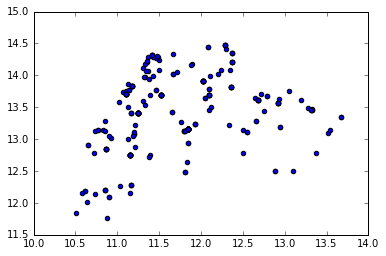

In [37]:
plt.scatter(lat, lon)

In [52]:
lat = df_borno['LATITUDE'].astype(float)

In [53]:
lon = df_borno['LONGITUDE'].astype(float)

In [38]:
import mplleaflet

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(lat, lon)
mplleaflet.show()